## Set Up

#### Import Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")

In [308]:
import pandas as pd # data analysis
import numpy as np # computing
import seaborn as sns # plotting / visualizations
import matplotlib.pyplot as plt # plotting / visualizations
import plotly.express as px # graphing
import geopandas as gpd # mapping

#### Import Files

In [3]:
pop_netflix = pd.read_excel('data/most-popular-netflix.xlsx')
pop_netflix

,category,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days
0,Films (English),1,Red Notice,NaN,454200000,1.9667,230900000
1,Films (English),2,Don't Look Up,NaN,408600000,2.3833,171400000
2,Films (English),3,The Adam Project,NaN,281000000,1.7833,157600000
3,Films (English),4,Bird Box,NaN,325300000,2.0667,157400000
4,Films (English),5,Leave the World Behind,NaN,339300000,2.3667,143400000
5,Films (English),6,The Gray Man,NaN,299500000,2.1500,139300000
6,Films (English),7,We Can Be Heroes,NaN,231200000,1.6833,137300000
7,Films (English),8,The Mother,NaN,265900000,1.9500,136400000
8,Films (English),9,Glass Onion: A Knives Out Mystery,NaN,320300000,2.3500,136300000
9,Films (English),10,Extraction,NaN,266900000,1.9667,135700000


In [4]:
global_netflix = pd.read_excel('data/all-weeks-global-netflix.xlsx')
global_netflix.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-04-14,Films (English),1,What Jennifer Did,NaN,26100000,1.4500,18000000.0,1,False,NaN
1,2024-04-14,Films (English),2,Woody Woodpecker Goes to Camp,NaN,19600000,1.6667,11800000.0,1,False,NaN
2,2024-04-14,Films (English),3,Scoop,NaN,14600000,1.7167,8500000.0,2,False,NaN
3,2024-04-14,Films (English),4,Glass,NaN,11000000,2.1500,5100000.0,2,False,NaN
4,2024-04-14,Films (English),5,Megan Leavey,NaN,9700000,1.9333,5000000.0,1,False,NaN


In [5]:
countries_netflix = pd.read_excel('data/all-weeks-countries-netflix.xlsx')
countries_netflix.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-04-14,Films,1,The Tearsmith,NaN,2
1,Argentina,AR,2024-04-14,Films,2,Stolen,NaN,1
2,Argentina,AR,2024-04-14,Films,3,"Love, Divided",NaN,1
3,Argentina,AR,2024-04-14,Films,4,Woody Woodpecker Goes to Camp,NaN,1
4,Argentina,AR,2024-04-14,Films,5,Rest In Peace,NaN,3


## Preliminary EDA

#### Unique movie & season titles

In [6]:
c_titles = countries_netflix['show_title'].unique()
g_titles = global_netflix['show_title'].unique()
p_titles = pop_netflix['show_title'].unique()

In [7]:
len(c_titles)

7146

In [8]:
len(g_titles)

1915

In [9]:
len(p_titles)

35

In [10]:
c_season_titles = countries_netflix['season_title'].unique()
g_season_titles = global_netflix['season_title'].unique()
p_season_titles = pop_netflix['season_title'].unique()

In [11]:
len(c_season_titles)

2376

In [12]:
len(g_season_titles)

836

In [13]:
len(p_season_titles)

21

#### Weeks of data

In [14]:
c_dates = countries_netflix['week'].unique()
g_dates= global_netflix['week'].unique()

In [15]:
len(c_dates)

146

In [16]:
len(g_dates)

146

#### Category & Language

In [17]:
global_netflix[['category','language']] = global_netflix['category'].str.split('(',expand=True)
pop_netflix[['category','language']] = pop_netflix['category'].str.split('(',expand=True)

In [18]:
pop_netflix['language'] = pop_netflix['language'].map(lambda x: x.rstrip(')'))

In [19]:
global_netflix['language'] = global_netflix['language'].map(lambda x: x.rstrip(')'))

In [20]:
g_language= global_netflix['language'].unique()
p_language= pop_netflix['language'].unique()

In [21]:
g_language

array(['English', 'Non-English'], dtype=object)

In [22]:
p_language

array(['English', 'Non-English'], dtype=object)

In [23]:
c_category= countries_netflix['category'].unique()
g_category= global_netflix['category'].unique()
p_category= pop_netflix['category'].unique()

In [24]:
c_category

array(['Films', 'TV'], dtype=object)

In [25]:
g_category

array(['Films ', 'TV '], dtype=object)

In [26]:
p_category

array(['Films ', 'TV '], dtype=object)

#### Countries

In [27]:
c_country_name= countries_netflix['country_name'].unique()

In [28]:
len(c_country_name)

94

## Clean to what we want to analyze

#### Narrow to movies

In [29]:
p_movies = pop_netflix[pop_netflix["category"].str.contains("Films")]
g_movies = global_netflix[global_netflix["category"].str.contains("Films")]
c_movies = countries_netflix[countries_netflix["category"].str.contains("Films")]

In [30]:
len(p_movies)

20

In [31]:
len(g_movies)

2920

In [32]:
len(c_movies)

136130

#### Drop unnecessary columns

In [33]:
p_movies = p_movies.drop(columns=['season_title', 'category'])

In [34]:
g_movies = g_movies.drop(columns=['season_title', 'is_staggered_launch', 'episode_launch_details', 'category'])

In [35]:
c_movies = c_movies.drop(columns=['season_title', 'category', 'country_iso2'])

#### merge pop and global

In [36]:
pg_movies = p_movies.merge(g_movies,how='left', left_on='show_title', right_on='show_title')

In [37]:
pg_movies

,rank,show_title,hours_viewed_first_91_days,runtime_x,views_first_91_days,language_x,week,weekly_rank,weekly_hours_viewed,runtime_y,weekly_views,cumulative_weeks_in_top_10,language_y
0,1,Red Notice,454200000,1.9667,230900000,English,2022-07-31,10.0,4090000.0,NaN,NaN,14.0,English
1,1,Red Notice,454200000,1.9667,230900000,English,2022-02-27,10.0,4970000.0,NaN,NaN,13.0,English
2,1,Red Notice,454200000,1.9667,230900000,English,2022-01-30,6.0,6540000.0,NaN,NaN,12.0,English
3,1,Red Notice,454200000,1.9667,230900000,English,2022-01-23,8.0,7310000.0,NaN,NaN,11.0,English
4,1,Red Notice,454200000,1.9667,230900000,English,2022-01-16,6.0,8710000.0,NaN,NaN,10.0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,10,All Quiet on the Western Front,129400000,2.4833,52100000,Non-English,2022-11-27,3.0,4870000.0,NaN,NaN,5.0,Non-English
175,10,All Quiet on the Western Front,129400000,2.4833,52100000,Non-English,2022-11-20,2.0,9490000.0,NaN,NaN,4.0,Non-English
176,10,All Quiet on the Western Front,129400000,2.4833,52100000,Non-English,2022-11-13,2.0,17610000.0,NaN,NaN,3.0,Non-English
177,10,All Quiet on the Western Front,129400000,2.4833,52100000,Non-English,2022-11-06,1.0,39950000.0,NaN,NaN,2.0,Non-English


#### Drop redundant columns

In [38]:
pg_movies = pg_movies.drop(columns=['runtime_y', 'weekly_views', 'language_y'])

#### Merge Country and PG Movies

In [39]:
movies_final = c_movies.merge(pg_movies,how='left', left_on=['show_title', 'week'], right_on=['show_title', 'week'])

In [40]:
movies_final

,country_name,week,weekly_rank_x,show_title,cumulative_weeks_in_top_10_x,rank,hours_viewed_first_91_days,runtime_x,views_first_91_days,language_x,weekly_rank_y,weekly_hours_viewed,cumulative_weeks_in_top_10_y
0,Argentina,2024-04-14,1,The Tearsmith,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2024-04-14,2,Stolen,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2024-04-14,3,"Love, Divided",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2024-04-14,4,Woody Woodpecker Goes to Camp,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2024-04-14,5,Rest In Peace,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136125,Vietnam,2021-07-04,6,Camellia Sisters,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136126,Vietnam,2021-07-04,7,12 Strong,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136127,Vietnam,2021-07-04,8,Glitch,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136128,Vietnam,2021-07-04,9,Pokémon Detective Pikachu,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove Null Values

In [41]:
movies_final = movies_final.dropna()

In [42]:
movies_final

,country_name,week,weekly_rank_x,show_title,cumulative_weeks_in_top_10_x,rank,hours_viewed_first_91_days,runtime_x,views_first_91_days,language_x,weekly_rank_y,weekly_hours_viewed,cumulative_weeks_in_top_10_y
88,Argentina,2024-02-18,9,Society of the Snow,7,2.0,239700000.0,2.4333,98500000.0,Non-English,6.0,7600000.0,7.0
95,Argentina,2024-02-11,6,Society of the Snow,6,2.0,239700000.0,2.4333,98500000.0,Non-English,3.0,9900000.0,6.0
102,Argentina,2024-02-04,3,Society of the Snow,5,2.0,239700000.0,2.4333,98500000.0,Non-English,2.0,16900000.0,5.0
111,Argentina,2024-01-28,2,Society of the Snow,4,2.0,239700000.0,2.4333,98500000.0,Non-English,3.0,25900000.0,4.0
120,Argentina,2024-01-21,1,Society of the Snow,3,2.0,239700000.0,2.4333,98500000.0,Non-English,1.0,32700000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135930,Vietnam,2021-11-14,1,Red Notice,1,1.0,454200000.0,1.9667,230900000.0,English,1.0,148720000.0,1.0
136065,Vietnam,2021-08-15,6,Blood Red Sky,4,7.0,124800000.0,2.0500,60900000.0,Non-English,4.0,6470000.0,4.0
136070,Vietnam,2021-08-08,1,Blood Red Sky,3,7.0,124800000.0,2.0500,60900000.0,Non-English,3.0,13300000.0,3.0
136080,Vietnam,2021-08-01,1,Blood Red Sky,2,7.0,124800000.0,2.0500,60900000.0,Non-English,1.0,52370000.0,2.0


#### Update column names for clarity

In [43]:
movies_final = movies_final.rename(columns={'weekly_rank_x': 'weekly_rank_country', 'cumulative_weeks_in_top_10_x': 
                                            'weeks_in_top_10_country', 'cumulative_weeks_in_top_10_y': 
                                            'weeks_in_top_10_global', 'weekly_rank_y': 'weekly_rank_global', 
                                            'language_x': 'language', 'runtime_x': 'runtime(h)', 'rank': 'overall_rank',
                                            'runtime': 'runtime (h)'})

In [44]:
movies_final

,country_name,week,weekly_rank_country,show_title,weeks_in_top_10_country,overall_rank,hours_viewed_first_91_days,runtime(h),views_first_91_days,language,weekly_rank_global,weekly_hours_viewed,weeks_in_top_10_global
88,Argentina,2024-02-18,9,Society of the Snow,7,2.0,239700000.0,2.4333,98500000.0,Non-English,6.0,7600000.0,7.0
95,Argentina,2024-02-11,6,Society of the Snow,6,2.0,239700000.0,2.4333,98500000.0,Non-English,3.0,9900000.0,6.0
102,Argentina,2024-02-04,3,Society of the Snow,5,2.0,239700000.0,2.4333,98500000.0,Non-English,2.0,16900000.0,5.0
111,Argentina,2024-01-28,2,Society of the Snow,4,2.0,239700000.0,2.4333,98500000.0,Non-English,3.0,25900000.0,4.0
120,Argentina,2024-01-21,1,Society of the Snow,3,2.0,239700000.0,2.4333,98500000.0,Non-English,1.0,32700000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135930,Vietnam,2021-11-14,1,Red Notice,1,1.0,454200000.0,1.9667,230900000.0,English,1.0,148720000.0,1.0
136065,Vietnam,2021-08-15,6,Blood Red Sky,4,7.0,124800000.0,2.0500,60900000.0,Non-English,4.0,6470000.0,4.0
136070,Vietnam,2021-08-08,1,Blood Red Sky,3,7.0,124800000.0,2.0500,60900000.0,Non-English,3.0,13300000.0,3.0
136080,Vietnam,2021-08-01,1,Blood Red Sky,2,7.0,124800000.0,2.0500,60900000.0,Non-English,1.0,52370000.0,2.0


#### Drop global views data (doesn't make sense for country comparison)

In [45]:
movies_final = movies_final.drop(columns=['hours_viewed_first_91_days', 'views_first_91_days', 'weekly_hours_viewed'])

#### Reorder columns

In [46]:
cols = list(movies_final.columns.values)
cols

['country_name',
 'week',
 'weekly_rank_country',
 'show_title',
 'weeks_in_top_10_country',
 'overall_rank',
 'runtime(h)',
 'language',
 'weekly_rank_global',
 'weeks_in_top_10_global']

In [47]:
movies_final = movies_final[['show_title','week','country_name','weekly_rank_country','weekly_rank_global','overall_rank',
                             'weeks_in_top_10_country','weeks_in_top_10_global','runtime(h)','language']]

In [48]:
movies_final

,show_title,week,country_name,weekly_rank_country,weekly_rank_global,overall_rank,weeks_in_top_10_country,weeks_in_top_10_global,runtime(h),language
88,Society of the Snow,2024-02-18,Argentina,9,6.0,2.0,7,7.0,2.4333,Non-English
95,Society of the Snow,2024-02-11,Argentina,6,3.0,2.0,6,6.0,2.4333,Non-English
102,Society of the Snow,2024-02-04,Argentina,3,2.0,2.0,5,5.0,2.4333,Non-English
111,Society of the Snow,2024-01-28,Argentina,2,3.0,2.0,4,4.0,2.4333,Non-English
120,Society of the Snow,2024-01-21,Argentina,1,1.0,2.0,3,3.0,2.4333,Non-English
...,...,...,...,...,...,...,...,...,...,...
135930,Red Notice,2021-11-14,Vietnam,1,1.0,1.0,1,1.0,1.9667,English
136065,Blood Red Sky,2021-08-15,Vietnam,6,4.0,7.0,4,4.0,2.0500,Non-English
136070,Blood Red Sky,2021-08-08,Vietnam,1,3.0,7.0,3,3.0,2.0500,Non-English
136080,Blood Red Sky,2021-08-01,Vietnam,1,1.0,7.0,2,2.0,2.0500,Non-English


#### Make ranks and weeks integers instead of strings/floats

In [49]:
movies_final['weekly_rank_country'] = movies_final['weekly_rank_country'].astype(int)
movies_final['weekly_rank_global'] = movies_final['weekly_rank_global'].astype(int)
movies_final['overall_rank'] = movies_final['overall_rank'].astype(int)
movies_final['weeks_in_top_10_country'] = movies_final['weeks_in_top_10_country'].astype(int)
movies_final['weeks_in_top_10_global'] = movies_final['weeks_in_top_10_global'].astype(int)

#### Change runtime to float

In [50]:
movies_final['runtime(h)'] = movies_final['runtime(h)'].astype(float)

#### Change language to English boolean

In [51]:
movies_final['English'] = np.where(movies_final['language'] == 'English', True, False)

In [52]:
movies_final = movies_final.drop(columns=['language'])

#### Convert week to date

In [53]:
movies_final['week'] = pd.to_datetime(
                          movies_final['week']) 

## Additional EDA

#### Unique Movie Titles

In [54]:
movies_titles_final = movies_final['show_title'].unique()

In [55]:
len(movies_titles_final)

17

In [56]:
movies_titles_final

array(['Society of the Snow', 'Leave the World Behind', 'Nowhere',
       'Extraction', 'The Mother', 'AKA',
       'All Quiet on the Western Front',
       'Glass Onion: A Knives Out Mystery', 'Troll',
       'My Name Is Vendetta', 'The Gray Man', 'Black Crab',
       'The Adam Project', 'Through My Window', "Don't Look Up",
       'Red Notice', 'Blood Red Sky'], dtype=object)

In [57]:
movies_title_country_limited = movies_final[['show_title', 'country_name', 'runtime(h)']]

In [58]:
title_country = (movies_title_country_limited['show_title'] + '_' + movies_title_country_limited['country_name'])

In [59]:
title_country

88        Society of the Snow_Argentina
95        Society of the Snow_Argentina
102       Society of the Snow_Argentina
111       Society of the Snow_Argentina
120       Society of the Snow_Argentina
                      ...              
135930               Red Notice_Vietnam
136065            Blood Red Sky_Vietnam
136070            Blood Red Sky_Vietnam
136080            Blood Red Sky_Vietnam
136091            Blood Red Sky_Vietnam
Length: 6998, dtype: object

In [60]:
movies_title_country_limited['title_country'] = title_country

In [61]:
movies_title_country_limited = movies_title_country_limited.drop_duplicates(subset='title_country')

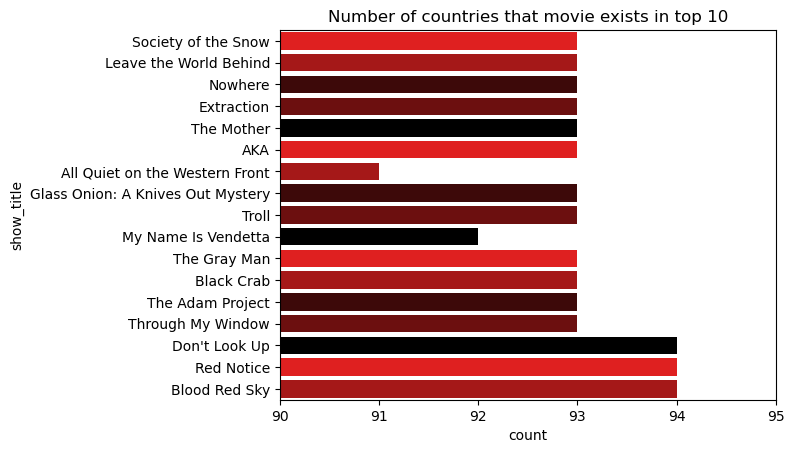

In [198]:
# number of counts of each title
fig, ax = plt.subplots()
palette = ['#ff0000', '#bd0000', '#460000', '#7b0000', '#000000']
sns.countplot(y='show_title', data=movies_title_country_limited, palette=palette)
ax.set_xlim(90, 95)
ax.set_title( "Number of countries that movie exists in top 10")  
plt.show()

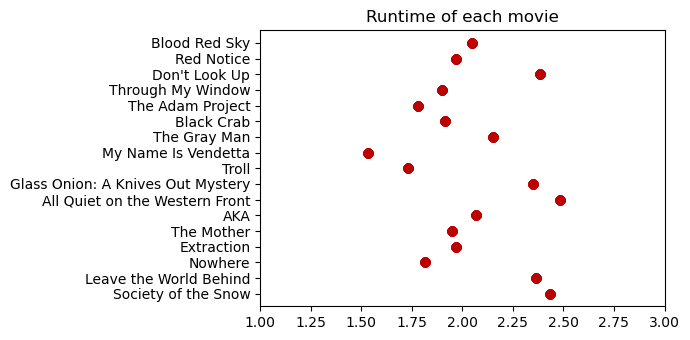

In [318]:
# number of counts of each title
fig, ax = plt.subplots()
plt.scatter(x=movies_title_country_limited['runtime(h)'], y=movies_title_country_limited['show_title'], c='#bd0000')
ax.set_xlim(1,3)
ax.set_title( "Runtime of each movie")  
plt.show()

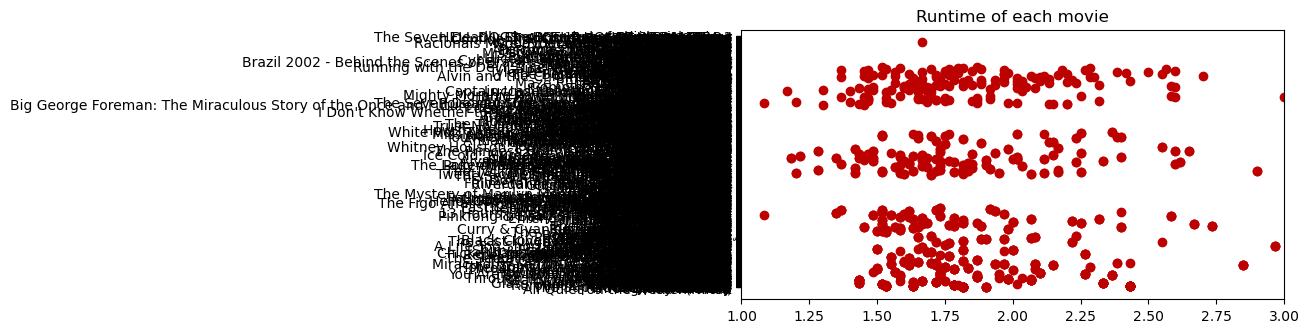

In [317]:
# number of counts of each title
fig, ax = plt.subplots()
plt.scatter(x=g_movies['runtime'], y=g_movies['show_title'], c='#bd0000')
ax.set_xlim(1,3)
ax.set_title( "Runtime of each movie")  
plt.show()

#### Countries by movie

In [64]:
society_snow = movies_final.loc[movies_final['show_title'] == 'Society of the Snow']
society_snow_countries = society_snow['country_name'].unique()
society_snow_countries

array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Guadeloupe', 'Guatemala', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives',
       'Malta', 'Martinique', 'Mauritius', 'Mexico', 'Morocco',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Réunion', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South 

In [65]:
leave_world_behind = movies_final.loc[movies_final['show_title'] == 'Leave the World Behind']
leave_world_behind_countries = leave_world_behind['country_name'].unique()
list(set(society_snow_countries).difference(leave_world_behind_countries))

[]

In [66]:
nowhere = movies_final.loc[movies_final['show_title'] == 'Nowhere']
nowhere_countries = nowhere['country_name'].unique()
list(set(society_snow_countries).difference(nowhere_countries))

[]

In [67]:
mother = movies_final.loc[movies_final['show_title'] == 'The Mother']
mother_countries = mother['country_name'].unique()
list(set(society_snow_countries).difference(mother_countries))

[]

In [68]:
aka = movies_final.loc[movies_final['show_title'] == 'AKA']
aka_countries = aka['country_name'].unique()
list(set(society_snow_countries).difference(aka_countries))

[]

In [69]:
all_quiet_western_front = movies_final.loc[movies_final['show_title'] == 'All Quiet on the Western Front']
all_quiet_western_front_countries = all_quiet_western_front['country_name'].unique()
list(set(society_snow_countries).difference(all_quiet_western_front_countries))

['Mauritius', 'Nigeria']

In [70]:
glass_onion = movies_final.loc[movies_final['show_title'] == 'Glass Onion: A Knives Out Mystery']
glass_onion_countries = glass_onion['country_name'].unique()
list(set(society_snow_countries).difference(glass_onion_countries))

[]

In [71]:
troll = movies_final.loc[movies_final['show_title'] == 'Troll']
troll_countries = troll['country_name'].unique()
list(set(society_snow_countries).difference(troll_countries))

[]

In [72]:
name_vendetta = movies_final.loc[movies_final['show_title'] == 'My Name Is Vendetta']
name_vendetta_countries = name_vendetta['country_name'].unique()
list(set(society_snow_countries).difference(name_vendetta_countries))

['India']

In [73]:
gray_man = movies_final.loc[movies_final['show_title'] == 'The Gray Man']
gray_man_countries = gray_man['country_name'].unique()
list(set(society_snow_countries).difference(gray_man_countries))

[]

In [74]:
black_crab = movies_final.loc[movies_final['show_title'] == 'Black Crab']
black_crab_countries = black_crab['country_name'].unique()
list(set(society_snow_countries).difference(black_crab_countries))

[]

In [75]:
adam_project = movies_final.loc[movies_final['show_title'] == 'The Adam Project']
adam_project_countries = adam_project['country_name'].unique()
list(set(society_snow_countries).difference(adam_project_countries))

[]

In [76]:
through_window = movies_final.loc[movies_final['show_title'] == 'Through My Window']
through_window_countries = through_window['country_name'].unique()
through_window_dif1 = list(set(society_snow_countries).difference(through_window_countries))
through_window_dif2 = list(set(through_window_countries).difference(society_snow_countries))
print('Not in ' + str(through_window_dif1[0]))
print('Is in ' + str(through_window_dif2[0]))

Not in Japan
Is in Russia


In [77]:
dont_look_up = movies_final.loc[movies_final['show_title'] == "Don't Look Up"]
dont_look_up_countries = dont_look_up['country_name'].unique()
list(set(dont_look_up_countries).difference(society_snow_countries))

['Russia']

In [78]:
red_notice = movies_final.loc[movies_final['show_title'] == 'Red Notice']
red_notice_countries = red_notice['country_name'].unique()
list(set(red_notice_countries).difference(society_snow_countries))

['Russia']

In [297]:
blood_red_sky = movies_final.loc[movies_final['show_title'] == 'Blood Red Sky']
blood_red_sky_countries = blood_red_sky['country_name'].unique()
list(set(blood_red_sky_countries).difference(society_snow_countries))

['Russia']

In [80]:
top_movies_all_dfs_all_countries = ["Don't Look Up", 'Red Notice', 'Blood Red Sky']

In [81]:
top_all_countries_pop = pop_netflix[pop_netflix['show_title'].isin(top_movies_all_dfs_all_countries)]
top_all_countries_pop

,category,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days,language
0,Films,1,Red Notice,NaN,454200000,1.9667,230900000,English
1,Films,2,Don't Look Up,NaN,408600000,2.3833,171400000,English
16,Films,7,Blood Red Sky,NaN,124800000,2.0500,60900000,Non-English


In [82]:
top_all_countries_global = global_netflix[global_netflix['show_title'].isin(top_movies_all_dfs_all_countries)]
top_all_countries_global = top_all_countries_global.sort_values(by=['cumulative_weeks_in_top_10'], ascending=False)
top_all_countries_global.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details,language
3098,2022-10-23,Films,9,Blood Red Sky,NaN,1510000,NaN,NaN,16,False,NaN,Non-English
3416,2022-08-28,Films,7,Blood Red Sky,NaN,2930000,NaN,NaN,15,False,NaN,Non-English
3455,2022-08-21,Films,6,Blood Red Sky,NaN,5180000,NaN,NaN,14,False,NaN,Non-English
3569,2022-07-31,Films,10,Red Notice,NaN,4090000,NaN,NaN,14,False,NaN,English
3495,2022-08-14,Films,6,Blood Red Sky,NaN,3540000,NaN,NaN,13,False,NaN,Non-English


In [320]:
g_movies = g_movies.sort_values(by=['cumulative_weeks_in_top_10'], ascending=False)
g_movies.head(50)

,week,weekly_rank,show_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,language
1938,2023-05-14,9,All Quiet on the Western Front,1280000,NaN,NaN,23,Non-English
2059,2023-04-23,10,All Quiet on the Western Front,1340000,NaN,NaN,22,Non-English
2098,2023-04-16,9,All Quiet on the Western Front,1660000,NaN,NaN,21,Non-English
2136,2023-04-09,7,All Quiet on the Western Front,2310000,NaN,NaN,20,Non-English
2175,2023-04-02,6,All Quiet on the Western Front,3420000,NaN,NaN,19,Non-English
2256,2023-03-19,7,RRR (Hindi),2670000,NaN,NaN,18,Non-English
2214,2023-03-26,5,All Quiet on the Western Front,6850000,NaN,NaN,18,Non-English
254,2024-03-03,5,Through My Window,4400000,1.9000,2300000.0,18,Non-English
2575,2023-01-22,6,RRR (Hindi),2200000,NaN,NaN,17,Non-English
2251,2023-03-19,2,All Quiet on the Western Front,9530000,NaN,NaN,17,Non-English


In [84]:
top_all_countries_countries = countries_netflix[countries_netflix['show_title'].isin(top_movies_all_dfs_all_countries)]
top_all_countries_countries = top_all_countries_countries.sort_values(by=['cumulative_weeks_in_top_10'], ascending=False)
top_all_countries_countries

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
252026,Ukraine,UA,2024-02-04,Films,7,Red Notice,NaN,73
252049,Ukraine,UA,2024-01-28,Films,10,Red Notice,NaN,72
252067,Ukraine,UA,2024-01-21,Films,8,Red Notice,NaN,71
252509,Ukraine,UA,2023-08-20,Films,10,Red Notice,NaN,70
252688,Ukraine,UA,2023-06-18,Films,9,Red Notice,NaN,69
...,...,...,...,...,...,...,...,...
160200,Netherlands,NL,2021-11-14,Films,1,Red Notice,NaN,1
160080,Netherlands,NL,2021-12-26,Films,1,Don't Look Up,NaN,1
157601,Morocco,MA,2021-07-25,Films,2,Blood Red Sky,NaN,1
157280,Morocco,MA,2021-11-14,Films,1,Red Notice,NaN,1


In [85]:
c_movies = c_movies.sort_values(by=['cumulative_weeks_in_top_10'], ascending=False)
c_movies.head(50)

,country_name,week,weekly_rank,show_title,cumulative_weeks_in_top_10
252026,Ukraine,2024-02-04,7,Red Notice,73
252049,Ukraine,2024-01-28,10,Red Notice,72
252067,Ukraine,2024-01-21,8,Red Notice,71
252509,Ukraine,2023-08-20,10,Red Notice,70
252688,Ukraine,2023-06-18,9,Red Notice,69
252766,Ukraine,2023-05-21,7,Red Notice,68
252786,Ukraine,2023-05-14,7,Red Notice,67
252804,Ukraine,2023-05-07,5,Red Notice,66
252826,Ukraine,2023-04-30,7,Red Notice,65
252846,Ukraine,2023-04-23,7,Red Notice,64


In [86]:
movies_title_country_ltd = c_movies[['show_title', 'country_name', 'cumulative_weeks_in_top_10']]

In [87]:
title_country2 = (movies_title_country_ltd['show_title'] + '_' + movies_title_country_ltd['country_name'])

In [88]:
movies_title_country_ltd['title_country'] = title_country2

In [89]:
movies_title_country_ltd = movies_title_country_ltd.drop_duplicates(subset='title_country')

In [90]:
movies_title_country_ltd_counts = movies_title_country_ltd['show_title'].value_counts().rename_axis('show_title').reset_index(name='counts')
movies_title_country_ltd_counts

,show_title,counts
0,Red Notice,94
1,Night Teeth,94
2,The Royal Treatment,94
3,The Harder They Fall,94
4,Blood Red Sky,94
...,...,...
5309,The Lady Improper,1
5310,Mamasapano: Now It Can Be Told,1
5311,My Mr. Wife,1
5312,The Myth,1


In [91]:
titles_all_countries = movies_title_country_ltd_counts[movies_title_country_ltd_counts.counts == 94]

In [92]:
titles_all_countries_list = titles_all_countries['show_title'].tolist()
titles_all_countries_list

['Red Notice',
 'Night Teeth',
 'The Royal Treatment',
 'The Harder They Fall',
 'Blood Red Sky',
 'Kate',
 'The Tinder Swindler',
 'The Unforgivable',
 'The Kissing Booth 3',
 "Don't Look Up",
 'Intrusion',
 'Love Hard',
 'Texas Chainsaw Massacre',
 'Sweet Girl',
 'The Guilty',
 'Beckett',
 'Army of Thieves']

In [93]:
all_titles_all_countries = movies_title_country_ltd[movies_title_country_ltd['show_title'].isin(titles_all_countries_list)]
all_titles_all_countries.head(50)

,show_title,country_name,cumulative_weeks_in_top_10,title_country
252026,Red Notice,Ukraine,73,Red Notice_Ukraine
252768,Army of Thieves,Ukraine,28,Army of Thieves_Ukraine
211908,Red Notice,Serbia,24,Red Notice_Serbia
271127,Red Notice,Vietnam,22,Red Notice_Vietnam
65547,Red Notice,Estonia,22,Red Notice_Estonia
91209,Red Notice,Hungary,21,Red Notice_Hungary
126828,Red Notice,Latvia,20,Red Notice_Latvia
253849,Don't Look Up,Ukraine,19,Don't Look Up_Ukraine
27489,Red Notice,Bulgaria,18,Red Notice_Bulgaria
180286,Red Notice,Pakistan,17,Red Notice_Pakistan


In [94]:
all_titles_all_countries_global = g_movies[g_movies['show_title'].isin(titles_all_countries_list)]
all_titles_all_countries_global.head(50)

,week,weekly_rank,show_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,language
3098,2022-10-23,9,Blood Red Sky,1510000,NaN,NaN,16,Non-English
3416,2022-08-28,7,Blood Red Sky,2930000,NaN,NaN,15,Non-English
3455,2022-08-21,6,Blood Red Sky,5180000,NaN,NaN,14,Non-English
3569,2022-07-31,10,Red Notice,4090000,NaN,NaN,14,English
4449,2022-02-27,10,Red Notice,4970000,NaN,NaN,13,English
3495,2022-08-14,6,Blood Red Sky,3540000,NaN,NaN,13,Non-English
4605,2022-01-30,6,Red Notice,6540000,NaN,NaN,12,English
3537,2022-08-07,8,Blood Red Sky,2590000,NaN,NaN,12,Non-English
4647,2022-01-23,8,Red Notice,7310000,NaN,NaN,11,English
4617,2022-01-30,8,Blood Red Sky,1690000,NaN,NaN,11,Non-English


In [101]:
movies_title_country_ltd_top3 = movies_title_country_ltd[movies_title_country_ltd['show_title'].isin(top_movies_all_dfs_all_countries)]

In [102]:
movies_title_country_ltd_top3 = movies_title_country_ltd_top3.drop(columns=['country_name','title_country'])

In [103]:
movies_title_country_ltd_top3

,show_title,cumulative_weeks_in_top_10
252026,Red Notice,73
211908,Red Notice,24
271127,Red Notice,22
65547,Red Notice,22
91209,Red Notice,21
...,...,...
32022,Blood Red Sky,2
52460,Blood Red Sky,2
55381,Blood Red Sky,2
105020,Blood Red Sky,2


In [104]:
movies_title_country_ltd_top3 = movies_title_country_ltd_top3.groupby(by=["show_title"]).sum()

In [106]:
movies_title_country_ltd_top3 = movies_title_country_ltd_top3.reset_index()

In [107]:
movies_title_country_ltd_top3

,show_title,cumulative_weeks_in_top_10
0,Blood Red Sky,296
1,Don't Look Up,583
2,Red Notice,956


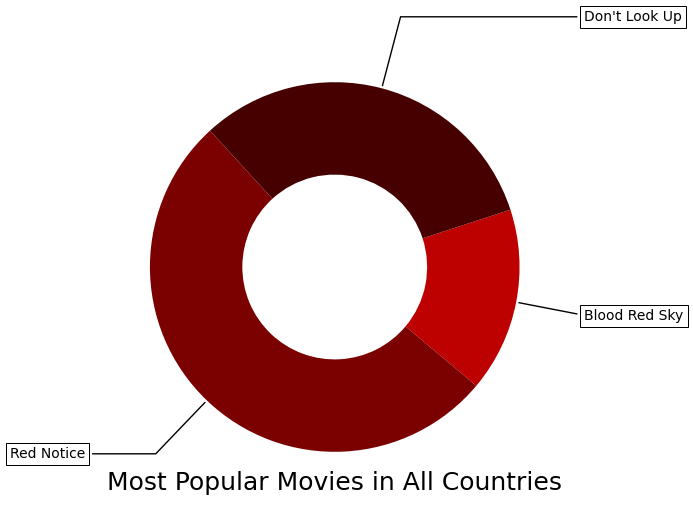

In [214]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(movies_title_country_ltd_top3['cumulative_weeks_in_top_10'], wedgeprops=dict(width=0.5), 
                       startangle=-40, 
                       colors=['#bd0000', '#460000', '#7b0000'])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(movies_title_country_ltd_top3['show_title'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title("Most Popular Movies in All Countries", y=-0.0, fontsize=18)

plt.show()

In [259]:
titles_all_countries_list2 = all_quiet_diff1 = list(set(titles_all_countries_list).
                                                    difference(top_movies_all_dfs_all_countries))

In [265]:
titles_all_countries_list2

['The Royal Treatment',
 'The Harder They Fall',
 'The Unforgivable',
 'The Guilty',
 'Intrusion',
 'Sweet Girl',
 'Army of Thieves',
 'Night Teeth',
 'Beckett',
 'Texas Chainsaw Massacre',
 'Kate',
 'Love Hard',
 'The Tinder Swindler',
 'The Kissing Booth 3']

In [266]:
popular_not_on_most_popular = g_movies[g_movies.show_title.isin(titles_all_countries_list2)]

In [267]:
popular_not_on_most_popular

,week,weekly_rank,show_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,language
4405,2022-03-06,6,The Tinder Swindler,9510000,NaN,NaN,5,English
4929,2021-12-05,10,Love Hard,7240000,NaN,NaN,5,English
4724,2022-01-09,5,The Unforgivable,11340000,NaN,NaN,5,English
4761,2022-01-02,2,The Unforgivable,21310000,NaN,NaN,4,English
5006,2021-11-21,7,Army of Thieves,12260000,NaN,NaN,4,English
5408,2021-09-12,9,Sweet Girl,6570000,NaN,NaN,4,English
5287,2021-10-03,8,Kate,5680000,NaN,NaN,4,English
4969,2021-11-28,10,Love Hard,9780000,NaN,NaN,4,English
4441,2022-02-27,2,The Tinder Swindler,17670000,NaN,NaN,4,English
5167,2021-10-24,8,The Guilty,4400000,NaN,NaN,4,English


In [268]:
popular_not_on_most_popular_sum = popular_not_on_most_popular.groupby(by=["show_title"]).sum()

In [269]:
popular_not_on_most_popular_sum = popular_not_on_most_popular_sum.reset_index()
popular_not_on_most_popular_sum

,show_title,weekly_rank,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
0,Army of Thieves,13,154070000,0.0,0.0,10
1,Beckett,6,47450000,0.0,0.0,3
2,Intrusion,7,42090000,0.0,0.0,3
3,Kate,15,93140000,0.0,0.0,10
4,Love Hard,28,137350000,0.0,0.0,15
5,Night Teeth,4,48880000,0.0,0.0,3
6,Sweet Girl,15,125260000,0.0,0.0,10
7,Texas Chainsaw Massacre,5,46620000,0.0,0.0,3
8,The Guilty,12,106870000,0.0,0.0,10
9,The Harder They Fall,10,111590000,0.0,0.0,6


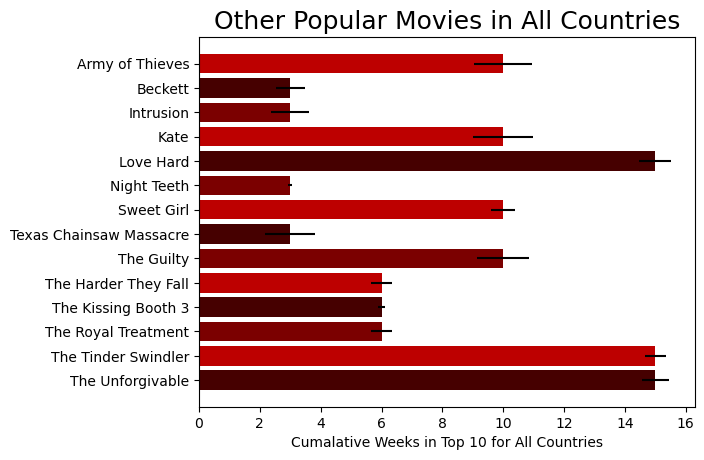

In [271]:
fig, ax = plt.subplots()

y_pos = np.arange(len(popular_not_on_most_popular_sum['show_title']))
error = np.random.rand(len(popular_not_on_most_popular_sum['show_title']))

ax.barh(y_pos, popular_not_on_most_popular_sum['cumulative_weeks_in_top_10'], xerr=error, align='center',
       color=['#bd0000', '#460000', '#7b0000'])
ax.set_yticks(y_pos, labels=popular_not_on_most_popular_sum['show_title'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cumalative Weeks in Top 10 for All Countries')
ax.set_title('Other Popular Movies in All Countries', fontsize=18)

plt.show()

In [272]:
popular_not_on_most_popular_mean = popular_not_on_most_popular.groupby(by=["show_title"]).mean()

In [273]:
popular_not_on_most_popular_mean = popular_not_on_most_popular_mean.reset_index()
popular_not_on_most_popular_mean

,show_title,weekly_rank,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
0,Army of Thieves,3.250000,3.851750e+07,NaN,NaN,2.5
1,Beckett,3.000000,2.372500e+07,NaN,NaN,1.5
2,Intrusion,3.500000,2.104500e+07,NaN,NaN,1.5
3,Kate,3.750000,2.328500e+07,NaN,NaN,2.5
4,Love Hard,5.600000,2.747000e+07,NaN,NaN,3.0
5,Night Teeth,2.000000,2.444000e+07,NaN,NaN,1.5
6,Sweet Girl,3.750000,3.131500e+07,NaN,NaN,2.5
7,Texas Chainsaw Massacre,2.500000,2.331000e+07,NaN,NaN,1.5
8,The Guilty,3.000000,2.671750e+07,NaN,NaN,2.5
9,The Harder They Fall,3.333333,3.719667e+07,NaN,NaN,2.0


In [274]:
most_popular_all = movies_final[movies_final.show_title.isin(top_movies_all_dfs_all_countries)]
most_popular_all_mean = most_popular_all.groupby(by=["show_title"]).mean()
most_popular_all_mean = most_popular_all_mean.reset_index()
most_popular_all_mean

,show_title,weekly_rank_country,weekly_rank_global,overall_rank,weeks_in_top_10_country,weeks_in_top_10_global,runtime(h),English
0,Blood Red Sky,3.543919,1.902027,7.0,2.192568,2.442568,2.0500,0.0
1,Don't Look Up,3.167260,2.274021,2.0,3.590747,3.590747,2.3833,1.0
2,Red Notice,4.532676,3.440197,1.0,5.356350,5.473490,1.9667,1.0


In [282]:
movies_final_mean = movies_final.groupby(by=["show_title"]).mean()
movies_final_mean = movies_final_mean.sort_values(by=['weeks_in_top_10_global'], ascending=False).reset_index()

In [283]:
movies_final_mean

,show_title,weekly_rank_country,weekly_rank_global,overall_rank,weeks_in_top_10_country,weeks_in_top_10_global,runtime(h),English
0,All Quiet on the Western Front,5.868922,2.431290,10.0,4.054968,6.919662,2.4833,0.0
1,Red Notice,4.532676,3.440197,1.0,5.356350,5.473490,1.9667,1.0
2,The Adam Project,4.081031,2.088398,3.0,3.626151,3.675875,1.7833,1.0
3,Don't Look Up,3.167260,2.274021,2.0,3.590747,3.590747,2.3833,1.0
4,Glass Onion: A Knives Out Mystery,3.313008,2.174797,9.0,3.402439,3.408537,2.3500,1.0
5,Through My Window,5.081395,2.078488,5.0,2.802326,3.305233,1.9000,0.0
6,Society of the Snow,4.215686,1.659314,2.0,2.950980,2.995098,2.4333,0.0
7,The Mother,3.173719,1.650334,8.0,2.993318,2.993318,1.9500,1.0
8,The Gray Man,3.312785,2.630137,6.0,2.892694,2.888128,2.1500,1.0
9,Leave the World Behind,3.177033,1.693780,5.0,2.811005,2.813397,2.3667,1.0


<AxesSubplot:xlabel='cumulative_weeks_in_top_10', ylabel='weekly_rank'>

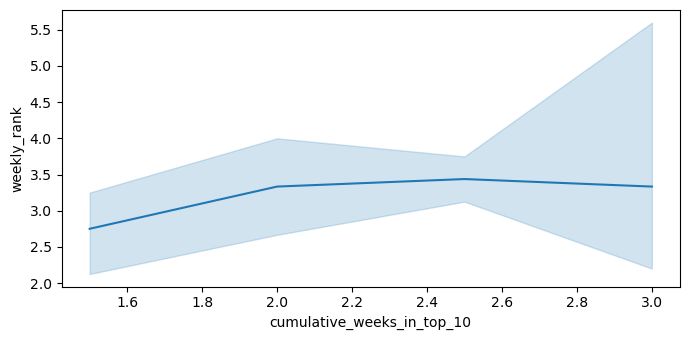

In [292]:
sns.lineplot(data=popular_not_on_most_popular_mean, x="cumulative_weeks_in_top_10", y="weekly_rank")

<AxesSubplot:xlabel='weeks_in_top_10_global', ylabel='weekly_rank_global'>

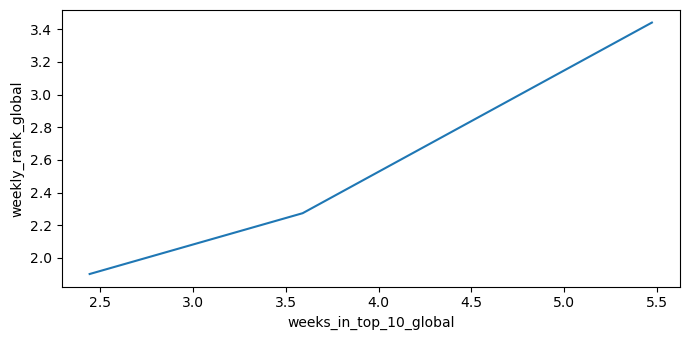

In [293]:
sns.lineplot(data=most_popular_all_mean, x="weeks_in_top_10_global", y="weekly_rank_global")

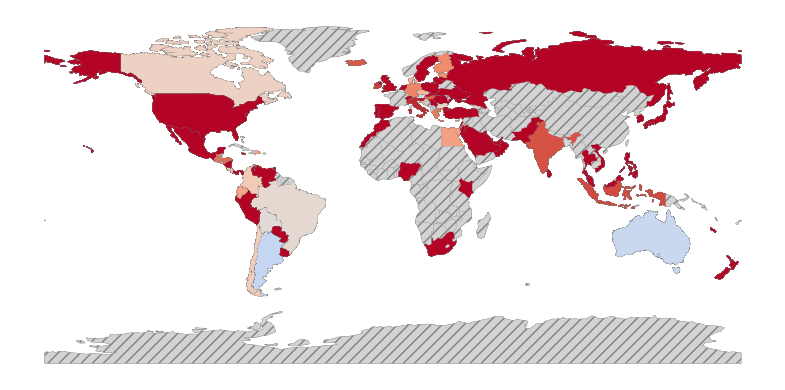

In [315]:
from matplotlib.colors import Normalize # Needed for normalize colors
from matplotlib.cm import ScalarMappable # Needed for color maps
from matplotlib.patches import Patch # Needed for adding figures

#Import the world shapefile 
world = gpd.read_file(r'ne_110m_admin_0_countries.shp')

# Create a matplitlob figure
fig, ax = plt.subplots(figsize=(8,4))
world.plot(linewidth=0.5, edgecolor='grey', legend=False, color='white', ax=ax)

ax.set_axis_off() #Hide the axes lines

# Merge the temperature data with the 'world' dataframe
map_for_date = world.merge(countries_netflix, how='left', left_on='ISO_A2', 
                           right_on='country_iso2')
    
# Plot the map
map_for_date.plot(column='country_name', cmap='coolwarm', linewidth=0.1, 
                  ax=ax, edgecolor='grey', legend=False, vmin=-25, 
                  vmax=35, missing_kwds={'color': 'lightgrey', 'hatch': '///'})

# Customizations
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off') #'turn off' the axes lines


plt.show()